# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [42]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

url = "https://es.wikipedia.org/wiki/Anexo:Canciones_m%C3%A1s_reproducidas_en_Spotify"
response = requests.get(url)

print(response.status_code)
print(response.text)




200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Anexo:Canciones más reproducidas en Spotify - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 

In [43]:
import pandas as pd
html = io.StringIO(response.text)
tables = pd.read_html(html)

print(f'N° de Tablas:{len(tables)}')

N° de Tablas:16


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   N.º                         96 non-null     int64         
 1   Canción                     96 non-null     object        
 2   Artista(s)                  96 non-null     object        
 3   Álbum                       96 non-null     object        
 4   Millones de reproducciones  96 non-null     float64       
 5   Fecha de publicación        0 non-null      datetime64[ns]
 6   País                        96 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.4+ KB


In [38]:
df.drop(df.tail(1).index,inplace=True)
df['Millones de reproducciones'] = df['Millones de reproducciones'].astype(float)
df['Fecha de publicación'] = pd.to_datetime(df['Fecha de publicación'], errors="coerce")
df['N.º'] = df['N.º'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   N.º                         96 non-null     int64         
 1   Canción                     96 non-null     object        
 2   Artista(s)                  96 non-null     object        
 3   Álbum                       96 non-null     object        
 4   Millones de reproducciones  96 non-null     float64       
 5   Fecha de publicación        0 non-null      datetime64[ns]
 6   País                        96 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.4+ KB


In [ ]:
#con beatifulsoup
soup = BeautifulSoup (response.text, 'html')
tablas = soup.find_all("table")

data = []
for row in tablas [0].find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data.append (row_data)

df2 = pd.DataFrame (data) 
df2.head ()
#esto no es recomendado por el profe


,0,1,2,3,4,5
0,None,None,None,None,None,None
1,Blinding Lights,The Weeknd,After Hours,"4,857",9 de agosto de 2020\n,Canadá Canadá\n
2,Shape of You,Ed Sheeran,÷,"4,378",3 de marzo de 2017\n,Reino Unido Reino Unido\n
3,Someone You Loved,Lewis Capaldi,Breach y Divinely Uninspired to a Hellish Extent,"3,917",8 de noviembre de 2018\n,Reino Unido Reino Unido\n
4,Starboy,"The Weeknd, Daft Punk",Starboy,"3,912",21 de septiembre de 2016\n,Canadá Canadá Francia\n


In [ ]:
conn = sqlite3.connect("Spotify_canciones_mas_escuchadas.db")
df.to_sql("mas_reproducidas",conn,if_exists="replace",index=False)

In [26]:
#paso #5 (consultando tabla tenemso que abrir cursor)

cursor = conn.cursor()
cursor.execute("SELECT * FROM mas_reproducidas")
print(cursor.fetchone())
conn.commit()
conn.close()

(1, 'Blinding Lights', 'The Weeknd', 'After Hours', 4857.0, None, 'Canadá')


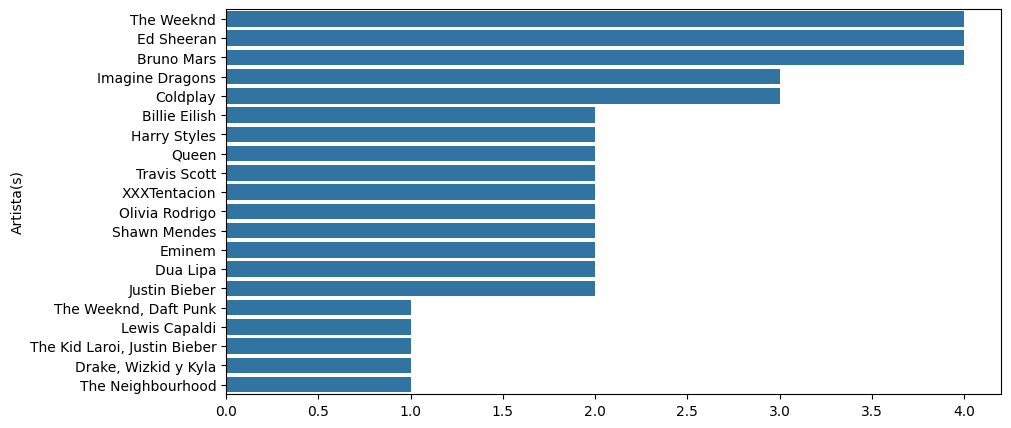

In [47]:
#paso 6
n_canciones_x_artista = df["Artista(s)"].value_counts().nlargest(20)

plt.figure(figsize=(10,5))
sns.barplot(x=n_canciones_x_artista.values,y=n_canciones_x_artista.index)
plt.show()